# Visualizing Irrigation Data

## Cem Onel

### Libraries

In [30]:
import pandas
import numpy
import datetime
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from pandas.plotting import register_matplotlib_converters
# %matplotlib qt

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

MIN_MOISTURE = 600

## Data Preparation

In [53]:
## Retrieve Data from Csv File
# irrigation_data = pandas.read_csv('low_sample_data/1.csv',sep='\t', encoding="ISO-8859-1")
irrigation_data = pandas.read_csv('low_sample_data/6.csv',sep=',', encoding="ISO-8859-1")

irrigation_data.dropna(inplace=True)
# Time Preparation
irrigation_data['time'] = irrigation_data['time'].apply(lambda ts: ts)
irrigation_data['time'] = irrigation_data['time'].apply(lambda ts: datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))
irrigation_data.set_index(irrigation_data['time'], inplace=True)

del irrigation_data['time']

# Soil-Mosutire Percantage Calculation
max_soil_moisture = irrigation_data['soil_moisture'].max()
irrigation_data['soil_moisture'] = irrigation_data['soil_moisture'].apply(lambda x: max_soil_moisture - x)
max_soil_moisture = irrigation_data['soil_moisture'].max()
min_soil_moisture = irrigation_data['soil_moisture'].min()

irrigation_data['soil_moisture'] = irrigation_data['soil_moisture'].apply(lambda x: (x/max_soil_moisture)*100)

irrigation_data

,soil_moisture,temperature,air_humidity
time,,,
2020-04-10 14:17:04,36.036036,25.1,57.0
2020-04-10 14:31:04,18.018018,24.2,62.0
2020-04-10 14:45:09,14.414414,24.1,64.0
2020-04-10 14:59:14,14.414414,24.0,65.0
2020-04-10 15:13:23,13.513514,24.1,67.0
...,...,...,...
2020-04-12 15:25:39,72.072072,24.3,88.0
2020-04-12 15:39:45,66.666667,24.3,89.0
2020-04-12 15:53:49,67.567568,24.3,93.0


## Visualize Data

Text(0, 0.5, 'Temperature(Celcius) -- SoilHUM(%) -- AirHUM(%)')

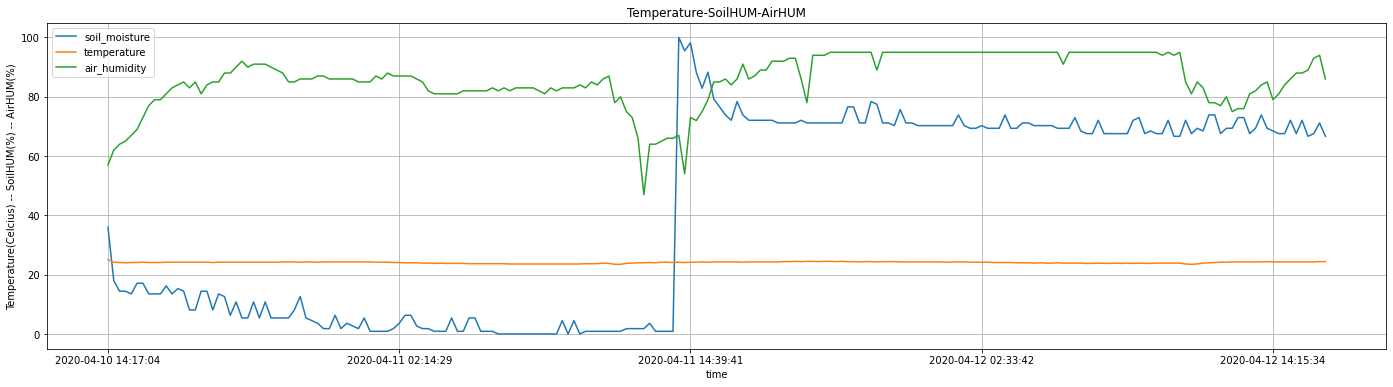

In [54]:
# register_matplotlib_converters()
plt.rcParams['figure.figsize'] = (24,6)   # Change the plot size
irrigation_data.plot(grid=True, title="Temperature-SoilHUM-AirHUM", kind="line").set_ylabel("Temperature(Celcius) -- SoilHUM(%) -- AirHUM(%)")




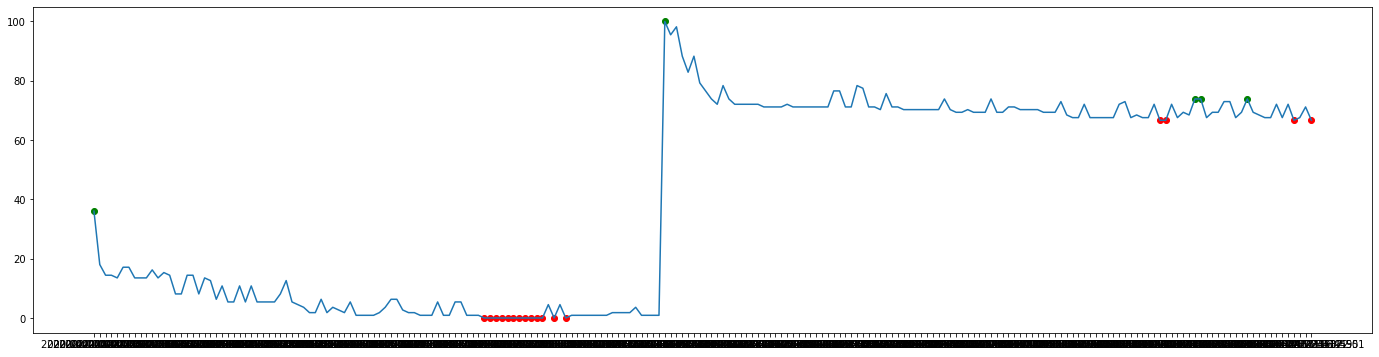

In [55]:
n=50 # number of points to be checked before and after 
# Find local peaks
irrigation_data['min'] = irrigation_data.iloc[argrelextrema(irrigation_data.soil_moisture.values, numpy.less_equal, order=n)[0]]['soil_moisture']
irrigation_data['max'] = irrigation_data.iloc[argrelextrema(irrigation_data.soil_moisture.values, numpy.greater_equal, order=n)[0]]['soil_moisture']

# Plot results
plt.scatter(irrigation_data.index, irrigation_data['min'], c='r')
plt.scatter(irrigation_data.index, irrigation_data['max'], c='g')
plt.plot(irrigation_data.index, irrigation_data['soil_moisture'])
plt.show()


In [56]:
threshold_value = irrigation_data.mean(axis = 0, skipna = True)[3]
print(f"Threshold Value: %{threshold_value} -- {max_soil_moisture*threshold_value/100}")
print(f"Min Moisture:{min_soil_moisture} -- Max Moisture:{max_soil_moisture}")



Threshold Value: %15.68627450980392 -- 17.41176470588235
Min Moisture:0 -- Max Moisture:111


In [57]:

irrigation_data["boolean"] = irrigation_data["min"]
irrigation_data["boolean"].fillna(0)
irrigation_data.loc[irrigation_data["boolean"] != 0, "boolean",] = 1
irrigation_data.drop(columns=['min', 'max'], inplace=True)
irrigation_data

,soil_moisture,temperature,air_humidity,boolean
time,,,,
2020-04-10 14:17:04,36.036036,25.1,57.0,1.0
2020-04-10 14:31:04,18.018018,24.2,62.0,1.0
2020-04-10 14:45:09,14.414414,24.1,64.0,1.0
2020-04-10 14:59:14,14.414414,24.0,65.0,1.0
2020-04-10 15:13:23,13.513514,24.1,67.0,1.0
...,...,...,...,...
2020-04-12 15:25:39,72.072072,24.3,88.0,1.0
2020-04-12 15:39:45,66.666667,24.3,89.0,1.0
2020-04-12 15:53:49,67.567568,24.3,93.0,1.0


In [58]:
irrigation_data.dropna(inplace=True)
irrigation_data.groupby('boolean').describe()
irrigation_data.describe()

,soil_moisture,temperature,air_humidity,boolean
count,210.000000,210.000000,210.000000,210.000000
mean,40.866581,24.095238,85.833333,0.938095
std,33.791613,0.264442,8.916724,0.241558
min,0.000000,23.500000,47.000000,0.000000
25%,3.828829,23.900000,82.000000,1.000000
50%,67.567568,24.200000,86.000000,1.000000
75%,71.171171,24.300000,95.000000,1.000000
max,100.000000,25.100000,95.000000,1.000000


In [59]:
irrigation_data_without_boolean = irrigation_data
irr_train, irr_test, label_train, label_test = train_test_split(irrigation_data,irrigation_data['boolean'],test_size=0.2)

irr_test



,soil_moisture,temperature,air_humidity,boolean
time,,,,
2020-04-11 14:55:09,88.288288,24.2,72.0,1.0
2020-04-11 23:16:58,75.675676,24.3,95.0,1.0
2020-04-11 23:44:58,71.171171,24.3,95.0,1.0
2020-04-10 23:10:32,1.801802,24.3,87.0,1.0
2020-04-10 20:18:23,10.810811,24.2,91.0,1.0
2020-04-11 20:41:33,71.171171,24.4,95.0,1.0
2020-04-10 19:06:18,12.612613,24.2,88.0,1.0
2020-04-11 10:57:00,0.900901,23.5,78.0,1.0
2020-04-11 04:21:27,5.405405,23.8,81.0,1.0


# MultinominalNB

In [60]:
pipeline = Pipeline([
    ('classifier',MultinomialNB()),
])

print(label_train)
print(irr_train)
pipeline.fit(irr_train,label_train)
predictions = pipeline.predict(irr_test)
# print(classification_report(predictions,label_test))
# predictions

time
2020-04-12 16:22:01    1.0
2020-04-12 13:06:05    1.0
2020-04-11 21:52:05    1.0
2020-04-11 15:14:50    1.0
2020-04-11 23:02:49    1.0
                      ... 
2020-04-11 21:23:54    1.0
2020-04-11 04:07:23    1.0
2020-04-12 03:02:11    1.0
2020-04-11 13:06:47    1.0
2020-04-12 12:38:20    1.0
Name: boolean, Length: 168, dtype: float64
                     soil_moisture  temperature  air_humidity  boolean
time                                                                  
2020-04-12 16:22:01      66.666667         24.4          86.0      1.0
2020-04-12 13:06:05      72.972973         24.3          76.0      1.0
2020-04-11 21:52:05      71.171171         24.4          95.0      1.0
2020-04-11 15:14:50      82.882883         24.3          75.0      1.0
2020-04-11 23:02:49      70.270270         24.4          95.0      1.0
...                            ...          ...           ...      ...
2020-04-11 21:23:54      76.576577         24.4          95.0      1.0
2020-04-11 04:07

# KNN

In [61]:
pipeline2 = Pipeline([
    ('classifier',KNeighborsClassifier(n_neighbors=3)),
])

pipeline2.fit(irr_train,label_train)
predictions = pipeline2.predict(irr_test)
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00        40

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



# Logistic Regression

In [62]:
pipeline3 = Pipeline([
    ('classifier',LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')),
])

pipeline3.fit(irr_train,label_train)
predictions = pipeline3.predict(irr_test)
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00        40

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



In [63]:
pipeline4 = Pipeline([
    ('classifier',GradientBoostingClassifier()),
])

pipeline4.fit(irr_train,label_train)
predictions = pipeline4.predict(irr_test)
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00        40

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

